# Taller 1

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad se considera entregada para calificación cuando el *cuaderno* de jupyter notebook con extensión `.ipynb` se sube al espacio correspondiente en el aula de Bloque Neón. Ningún material adicional será revisado.

4. La solución del taller debe ser realizado en **grupos**. No se aceptaran talleres de individuales. 

5. El cuaderno debe poderse correr sin errores al momento de evaluar.

## Criterios de evaluación.
Su calificación podrá ser penalizada por los siguientes items:

- Falta de seguimiento de las instrucciones.
- Código no-human readable. 
- Falta de una debida explicación y comentarios al código.

A continuación se listan los puntajes máximos para cada punto:
| **Punto** | **Puntaje Máximo** |
|:---------:|:------------------:|
|     1     |         1.0        |
|     2     |         2.0        |
|     3     |         2.0        |

Punto 1 (Calentamiento) vale 0.2 y el resto del punto 1 vale 0.8. Cada subnumeral del punto 2 y 3 vale lo mismo.

Este Taller evalúa los tópicos de la semana 1 a la 4 y tiene el valor de un 20% en su calificación final.

# Punto 1 (Calentamiento)

Construya una función que represente el lanzamiento de un dado de 6 caras. Lance el dado 1000 veces y guarde sus resultado en un vector. Calcule la media empírica y el valor esperado (teórico) de lanzar el mismo dado y compare los resultados. 

In [200]:
# Se importa numpy 

import numpy as np

# Se definen los seis posibles resultados

dado= [1,2,3,4,5,6]

# Se genera la función

def lanzamiento_dado(lista):

    """
    Definición de la función: Toma una lista del 1 al 6 y simula el lanzamiento de un dado. 
    Parámetros: lista (list): Valores del dado de 1 a 6.
    Retorna: resultado (float): Media de 1000 lanzamientos aleatorios.
    """
    resultados_lanzamiento= np.random.choice(lista,size=1000)
    media= np.mean(resultados_lanzamiento)

    return media

# Testeando la función y obteniendo la media empírica
media_empirica= lanzamiento_dado(dado)
print(media_empirica)

# Valor esperado teórico
resultados = np.array(dado)
probabilidades = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]) # Misma probabilidad de que salga cualquiera de los 6 números

valor_esperado = np.sum(resultados * probabilidades)
print(valor_esperado)

# Comparación de valores
if np.isclose(media_empirica, valor_esperado, atol=0.05):  # Compara si los valores están cerca bajo el criterio de una distancia de 0.05
    print("Los resultados son muy cercanos. La función refleja bien el valor esperado.")
else:
    print("Hay una diferencia significativa entre la media empírica y el valor esperado.")

3.429
3.5
Hay una diferencia significativa entre la media empírica y el valor esperado.


# Punto 1.5 (Moneda cargada)
Implemente una función en Python que simule el lanzamiento de una moneda cargada.

- La función debe llamarse `lanzar_moneda` y recibir un único parámetro `p` (`float`): Un número entre 0 y 1 que representa la probabilidad de obtener "Cara" en el lanzamiento.
- La probabilidad de obtener "Sello" será complementaria, es decir, `1 - p`.
- La función debe devolver un string:
  - `"C"` si el resultado del lanzamiento es "Cara".
  - `"S"` si el resultado del lanzamiento es "Sello".

Ejemplo de uso:
```python
resultado = lanzar_moneda(0.7)
print(resultado)  # Puede imprimir "C" con probabilidad 0.7 o "S" con probabilidad 0.3

In [201]:
import numpy as np
def lanzar_moneda(p: float) -> str:
    np.random.seed(42) # Fijamos la semilla para reproducibilidad
    """
    Lanza una moneda sesgada con probabilidad p de obtener "C" (cara).
    Parámetros: (p: float). Probabilidad de obtener cara, debe estar en el intervalo [0, 1].
    Retorna: (str). "C" si sale cara, "S" si sale sello.
    """
    if not (0 <= p <= 1):
        print("La probabilidad debe estar entre 0 y 1. Intenta de nuevo.")
        return ""
    aleatorio = np.random.rand()  # Número aleatorio entre 0 y 1
    if aleatorio < p:
        return "C"
    else:
        return "S"

print(lanzar_moneda(2))

La probabilidad debe estar entre 0 y 1. Intenta de nuevo.



Implemente el siguiente algoritmo para quitarle el sesgo a la moneda i.e. la probabilidad de sacar "C" es igual a la probabilidad de sacar "S".

**Algoritmo:**
1. Lance la moneda sesgada dos veces (utilice la función creada anteriormente con el mismo valor de `p` en ambos lanzamientos).
2. Si los dos lanzamientos tienen resultados diferentes, devuelve el primer resultado.
3. Si los dos lanzamientos son iguales, repite el experimento desde el inicio. Para hacer esto debe hacer uso del concepto de _recursión_. Investigue que es esto y cómo implementarlo en este caso. 
> Hint: En el Jupyter Notebook de la Sesión 3 hay un par de ejercicios y ejemplos acerca de la recursión.

Cree una función llamada `lanzamiento_desesgado()` para implementar este algoritmo. Note que para que este algoritmo funcione **NO** es necesario conocer el sesgo de la moneda (WOW, no?).

In [202]:
# Función para obtener un lanzamiento desesgado usando la técnica de Von Neumann
def lanzamiento_desesgado(p):    
    resultado_1= lanzar_moneda(p)
    resultado_2= lanzar_moneda (p)
    # Caso base: Si los dos lanzamientos tienen resultados diferentes, devuelve el primer resultado
    if resultado_1 != resultado_2:
        return resultado_1
    else:
        # Caso recursivo: Si los dos lanzamientos son iguales, se repite el experimento desde el inicio
        return lanzamiento_desesgado(p) 
lanzamiento_desesgado(0.7)

RecursionError: maximum recursion depth exceeded

Ejecute dos experimentos para comparar los resultados de una moneda sesgada (`lanzar_moneda(p)`) con los de una moneda desesgada (`lanzamiento_desesgado()`).

1. Elija un valor de `p` entre 0 y 1, donde `p` representa la probabilidad de obtener "Cara" (`"C"`) en la función `lanzar_moneda(p)`.
2. Ejecute `lanzar_moneda(p)` 1000 veces y registre cuántas veces obtiene "Cara" (`"C"`) y cuántas veces obtiene "Sello" (`"S"`).
3. Ejecute `lanzamiento_desesgado()` 1000 veces usando el mismo valor de `p` como referencia interna y registre los resultados de "Cara" y "Sello".
4. Reporte los resultados mostrando la cantidad total de "Cara" y "Sello" obtenidas con cada función.

Ejemplo
```python
Resultados de lanzar_moneda(p=0.7):
Caras: 705
Sellos: 295

Resultados de lanzamiento_desesgado():
Caras: 500
Sellos: 500

Analice cómo varía el número de llamadas recursivas de la función `lanzamiento_desesgado()` a medida que cambia el valor de `p`.

1. Ejecute `lanzamiento_desesgado()` 1000 veces para diferentes valores de `p`, por ejemplo (No tiene que correr estos valores):
   - `p = 0.1` → 1000 ejecuciones   
   - `p = 0.5` → 1000 ejecuciones  
   - `p = 0.9` → 1000 ejecuciones  
2. Registre cuántas veces la función se llama a sí misma en cada caso.
3. Explique la relación entre `p` y la cantidad de llamadas recursivas observadas.

- ¿Cómo afecta un valor de `p` cercano a 0 o 1 la cantidad de veces que la función se repite?
- ¿Existe algún valor de `p` que minimice las llamadas recursivas?

### Bono 1

Demuestre matemáticamente que el algoritmo anterior garantiza que el valor esperado de Caras es igual al valor esperado de Sellos. No es valido hacer simulaciones o Python. Devuelva su solución en la siguiente celda haciendo uso de latex y/o markdown.

BONO :)

## Punto 2. Construir el album de Panini

Ahora hagamos una simulación más compleja.

¿Cuántos sobres del album de Panini del Mundial necesito comprar para poder llenarlo? Supongamos lo siguiente:
- El album tiene 638 monas/laminitas.
- Todas las monas son igual de probables de encontrarse en los sobres.
- Un sobre puede tener monas/laminitas repetidas.
- Cada sobre trae 5 monas/laminas.
- No es posible intercambiar monas con otras personas.

Para responder esta pregunta podríamos tomar un camino [analítico](http://www.unige.ch/math/folks/velenik/Vulg/Paninimania.pdf) o de simulación computacional. En este caso, tomaremos el último.

### Punto 2.1.
Primero creemos **una función** que cree un album de Panini vacío. En este mundo abstracto, representamos un album como la lista de espacios vacías que nos faltan por llenar.

In [203]:
def estrenar_album(n_monas: int = 638) -> list[int]:
    """
    Definición de la función: Crea un álbum de Panini vacío representado como la lista de ids que faltan por llenar.
    Por convención, las monas se indexan desde 1 hasta n_monas.
    Parámetros: (n_monas : int). Número total de monas/laminitas del álbum.
    Retorna: (list[int]). Lista con los ids de todas las monas que faltan (álbum completamente vacío).
    """
    if n_monas <= 0:
        raise ValueError("n_monas debe ser un entero positivo.")
    return list(range(1, n_monas + 1))
album_i = estrenar_album(638)

Para este punto su respuesta se debe ver de la siguiente manera:

```python
album_i = estrenar_album()
album_i
```

```
[1, 2, ..., 638]
```

### Punto 2.2

Ahora vamos a crear una función que sea abrir un sobre de monas/laminitas. Es decir, cree una función que escoja 5 números al azar entre 1 y 638, todos con igual probabilidad de ocurrencia y con reemplazo (es decir, en un sobre puede tener repetidos).

> Hint: La distribución uniforme le puede ser útil acá.

In [204]:
# Mariana: Intento con parámetros bloqueados
def abrir_sobre() -> np.ndarray:
    """
    Definición función: Simula abrir un sobre de monas/laminitas del álbum Panini.
    Parámetros: Ninguno.
    Retorna: (np.ndarray). Arreglo con las monas obtenidas en el sobre (pueden venir repetidas).
    """
    # El size y el rango de las monas está "bloqueados" en 638 y 5, no importa qué intente poner el usuario
    n_monas = int(638)
    return np.random.randint(1, n_monas + 1, size=5)

# Ejemplo de uso
sobre_j = abrir_sobre()
print(sobre_j)

# Utilizamos una distribución uniforme porque en esta se asigna una probabilidad igual a todos los eventos posibles, en este caso a todas las monas del álbum. 
# Por otra parte, para contemplar el remplazo utilizamos size = sobre. Size le indica a la función cuántos números aleatorios queremos generar, en este caso 5, 
# indica que la realización de números aleatorios puede generarse con reemplazo.

[271 107  72  21 615]


In [205]:
# Solución 2: Intento con parámetros desbloqueados
# Mariana: Intento con parámetros bloqueados
def abrir_sobre(n_monas: int = 638, sobre: int = 5) -> np.ndarray:
    """
    Definición función: Simula abrir un sobre de monas/laminitas del álbum Panini.
    Parámetros: (n_monas : int). Número total de monas del álbum (por defecto 638).
                (sobre : int). Número de monas que vienen en un sobre (por defecto 5).
    Retorna: (np.ndarray). Arreglo con las monas obtenidas en el sobre (pueden venir repetidas).
    """
    # El size y el rango de las monas está "bloqueados" en 638 y 5, no importa qué intente poner el usuario
    n_monas = int(n_monas)
    return np.random.randint(1, n_monas + 1, size=sobre)

# Ejemplo de uso
sobre_j = abrir_sobre()
print(sobre_j)


[122 467 215 331 459]


Para este punto su respuesta se debe ver de la siguiente manera:

```python
sobre_j = abrir_sobre()
sobre_j
```

```
array([ 64, 377, 159, 619, 332])
```

### Punto 2.3.

Ahora definamos una función que sea pegar las monas/laminitas de nuestro paquete en nuestro album. 

Para hacer esto suponemos que nuestro `album_i` creado en el punto 2.1. es una lista con todas las monas/laminitas que hacen falta para llenar el album. En ese sentido, "pegar" las monas/laminitas en este consiste en eliminar los números que se tienen en el `sobre_j` del `album_i`.  

In [206]:
# Intento Mariana 1: Utilizando funciones 2.1 y 2.2 al interior de la función.
def pegar_monas(n_sobres: int, n_monas: int = 638) -> list[int]:
    """
    Definir función: Estrena un álbum, abre n_sobres sobres y pega las monas.
    Parámetros: (n_sobres : int). Número de sobres que se van a abrir.
                (n_monas : int). Número total de monas del álbum (por defecto 638).
    Retorna: (list[int]). Una lista de las monas que todavía faltan después de abrir n_sobres sobres.
    """
    album = estrenar_album(n_monas) 
    for _ in range(n_sobres):
        sobre = abrir_sobre()
        album = sorted(list(set(album) - set(sobre)))
    return album

# Prueba
faltantes = pegar_monas(n_sobres=500, n_monas=638)
print("Te faltan las monas:", faltantes)
print("En total aun te faltan", len(faltantes), "monas.")

Te faltan las monas: [45, 52, 68, 71, 197, 219, 240, 255, 290, 299, 333, 355, 433, 434, 479, 480, 486, 487, 528, 555, 600, 603]
En total aun te faltan 22 monas.


In [208]:
# Solución 2 
def pegar_monas(album: list[int], monas) -> list[int]:
    """
    Definir función: Elimina del álbum (lista de faltantes) las monas recibidas en 'monas'.
    Parámetros:(album : list[int]). Lista de monas que aún faltan en el álbum (p. ej., [1,2,3,...,638]).
               (monas : Iterable[int]). Colección de monas obtenidas (p. ej., [1] o el array devuelto por abrir_sobre()).
    Retorna: (list[int]). Nueva lista de faltantes tras “pegar” las monas recibidas.
    """
    # Convertimos a conjuntos para eliminar y luego ordenamos
    faltantes = set(album)
    faltantes -= set(monas)
    return sorted(faltantes)

album_i = estrenar_album(638)
print(album_i[0:5])  # Ver las primeras 5 que faltan
album_i = pegar_monas(album=album_i, monas=[1]) # Pegar la mona 1
print(album_i[0:5]) 

# Pegar las del sobre
sobre_j = abrir_sobre()
album_j = pegar_monas(album=album_i, monas=sobre_j)

[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]


A modo de ejemplo, su código debe funcionar de la siguiente manera:

```python
# A modo de ejemplo, peguemos la mona 1

# Primero veamos las primeras 5 monas que nos faltan pegar
album_i[0:5]
```

```
[1, 2, 3, 4, 5]
``` 

```python
# Peguemos la mona 1 veamos que sucede
album_i = pegar_monas(album = album_i, monas = [1])
album_i[0:5]
```

```
[2, 3, 4, 5, 6]
``` 

Note que ya el elemento "1" (la lamina/mona "1") no hace parte del `album_i`. Su función debe funcionar entonces de la siguiente manera:

```python
album_i = pegar_monas(album = album_i, monas = sobre_j)
```


## Punto 3. Simulaciones
Cree una simulación que consista en saber cuántos sobres necesitamos para llenar un album como el descrito en el punto 2.

### Punto 3.1.

Para hacerlo apóyese de un `while loop` bajo la siguiente lógica:

```python
# Definimos condiciones iniciales
album_i = estrenar_album()

# Vamos a abrir sobres hasta que llenemos el album
while len(album_i) > 0:
    # Simulamos abrir un sobre
    
    # Simulamos pegar las laminas en el sobre
    
    # Llevamos el conteo de cuántos sobres llevamos
    n_sobres += 1    

# Tenemos que abrir n_sobres
n_sobres
```

In [216]:
# Definimos condiciones iniciales
album_i = estrenar_album()
n_sobres = 0

while len(album_i) > 0:
    # Simulamos abrir un sobre    
    sobre_j = abrir_sobre()                
    # Simulamos pegar las laminas en el sobre
    album_i = pegar_monas(album_i, sobre_j) 
     # Llevamos el conteo de cuántos sobres llevamos
    n_sobres += 1                          
print("Número de sobres para llenar el álbum:", n_sobres)

Número de sobres para llenar el álbum: 927


### Punto 3.2.
Note que cada vez que corre la solución anterior le da un resultado de número de sobres diferente. Esto se da por la naturaleza aleatoria del problema.

Simule el proceso anterior 1000 veces y guarde el número de sobres que es necesario comprar para llenar el album para cada simulación. 

In [221]:
intentos = 1000
simulaciones = []
for _ in range(intentos):
    album_i = estrenar_album()   # empezamos con el álbum vacío
    n_sobres = 0                 # contador de sobres
    
    while len(album_i) > 0:      # seguimos hasta llenarlo
        sobre_j = abrir_sobre()
        album_i = pegar_monas(album_i, sobre_j)
        n_sobres += 1
    
    simulaciones.append(n_sobres)
simulaciones = np.array(simulaciones)

print("\nPromedio muestral de sobres necesarios para completar album:", simulaciones.mean().round(2))
print("Desviación estándar:", simulaciones.std().round(2))


Promedio muestral de sobres necesarios para completar album: 906.26
Desviación estándar: 170.68


Utilice el siguiente código para dibujar la distribución de los sobres necesarios para llenar el album.

```python
import matplotlib.pyplot as plt

plt.hist(simulaciones, bins = 30)
plt.title('Simulación de abrir 1000 sobres', size = 12)
plt.xlabel('Cantidad de sobres')
plt.ylabel('Cantidad')
```

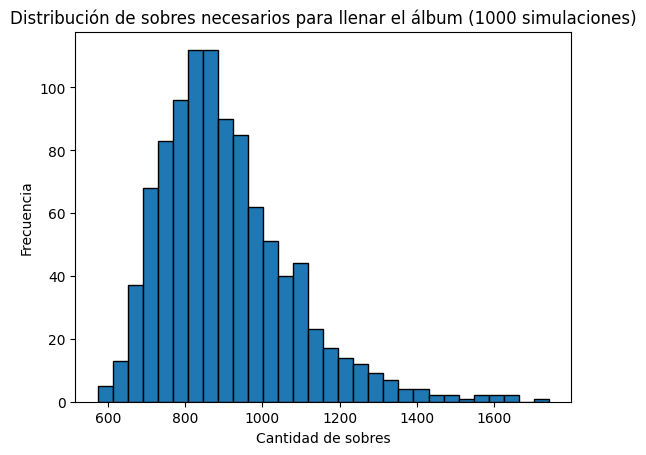

In [223]:
import matplotlib.pyplot as plt

plt.hist(simulaciones, bins=30, edgecolor="black")
plt.title('Distribución de sobres necesarios para llenar el álbum (1000 simulaciones)', size=12)
plt.xlabel('Cantidad de sobres')
plt.ylabel('Frecuencia')
plt.show()

### Bono 2
Este solo será valido si se responden todas las preguntas del bono y se muestra la solución.

1. Construya una Curva de Probabilidad Acumulada sobre `n_sobres` y grafiquela. 
2. Interprete la Curva.